# Predicting Customer Churn

**One of the primary function of a business is customer retention.  Maintaining a healthy customer base is essential for generating profits and ensuring growth.  Therefore, it is in the best interests of a company to identify to be able to access and utilize this information.  The ability to predict churn, measured as the number of individuals moving out of a specific group over a specific period of time is valuable information.  This dataset will be analyzed to predict customer churn.**

**This dataset answers some basic questions including who is most likely to churn, men or women? Do factors like dependents or contract term affect customer churn? What are the most significant features affecting churn?** 

## Data Summary:  

**This dataset was downloaded from [kaggle](http://www.kaggle.com).**  
**Source: https://www.kaggle.com/blastchar/telco-customer-churn.**

In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline
sns.set(style='whitegrid')
sns.set_context('notebook', font_scale=1.5)
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
df = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/Telco_Customer_Churn.csv'))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [3]:
# replace white spaces in total charges column with nan

df['TotalCharges'] = df["TotalCharges"].replace(' ',np.nan)

In [4]:
# drop all null values

df = df.dropna()

In [5]:
# drop customer id column

df = df.drop(['customerID', 'OnlineBackup', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'DeviceProtection',
             'StreamingMovies', 'MultipleLines'], 1)

In [6]:
# count rows and columns

df.shape

(7032, 13)

In [7]:
# get data types for each column

print('Columns and Data Types')
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and Data Types


,dtype
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
InternetService,object
Contract,object
PaperlessBilling,object
PaymentMethod,object


In [8]:
# convert total charges column to float

df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].describe()

count   7032.00
mean    2283.30
std     2266.77
min       18.80
25%      401.45
50%     1397.47
75%     3794.74
max     8684.80
Name: TotalCharges, dtype: float64

In [9]:
df.loc[(df.Churn == 'Yes')].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.00,1869.00,1869.00,1869.00
mean,0.25,17.98,74.44,1531.80
std,0.44,19.53,24.67,1890.82
min,0.00,1.00,18.85,18.85
25%,0.00,2.00,56.15,134.50
50%,0.00,10.00,79.65,703.55
75%,1.00,29.00,94.20,2331.30
max,1.00,72.00,118.35,8684.80


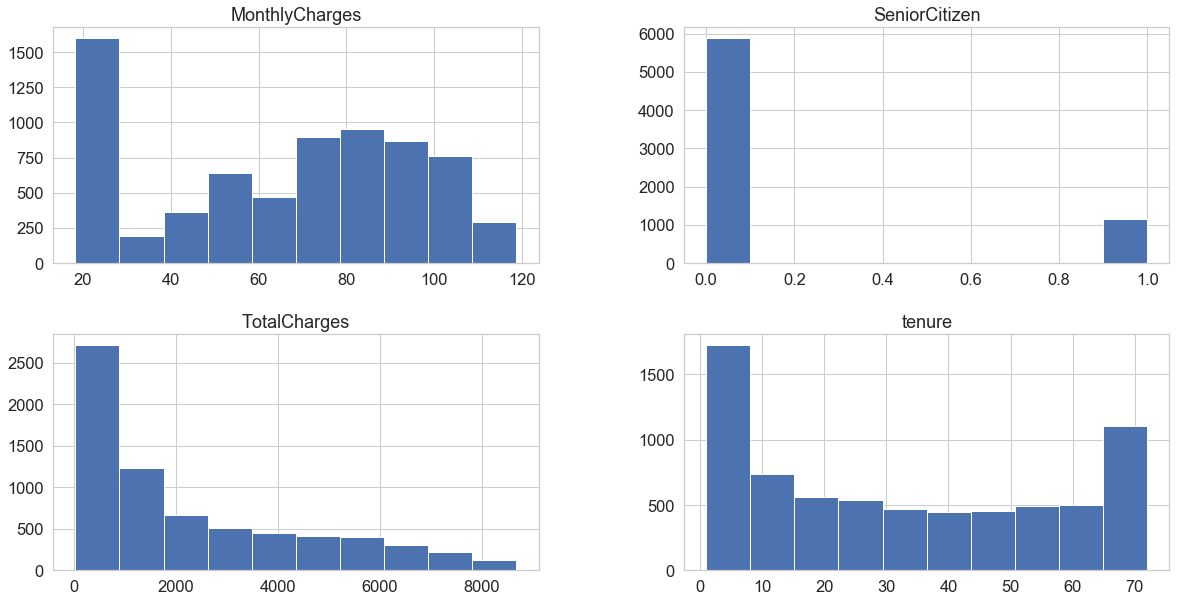

In [10]:
# Visualize the data
df.hist()
plt.show();

**The monthly charges histogram shows the majority of people have monthly bills in the range of $70-100, with the mean being $79.65, although there is a significant amount of people who have bills less than $30/month.**

**The total charges histogram follows the expected trend of customers paying more overall the longer they're with a company, and the number of long term customers decreasing over time.**  

**The tenure histogram has the largest concentration of customers have been with the company less than 10 months, with the second largest group having been with the company for more than 65 months.**

## Does churn vary for men and women?  

**Yes, it does. Of customers who churn, women churn earlier than men at approximately 17 months, compared to 19 months.  Of the customers who did churh, women also had slightly higher monthly bills than men.**

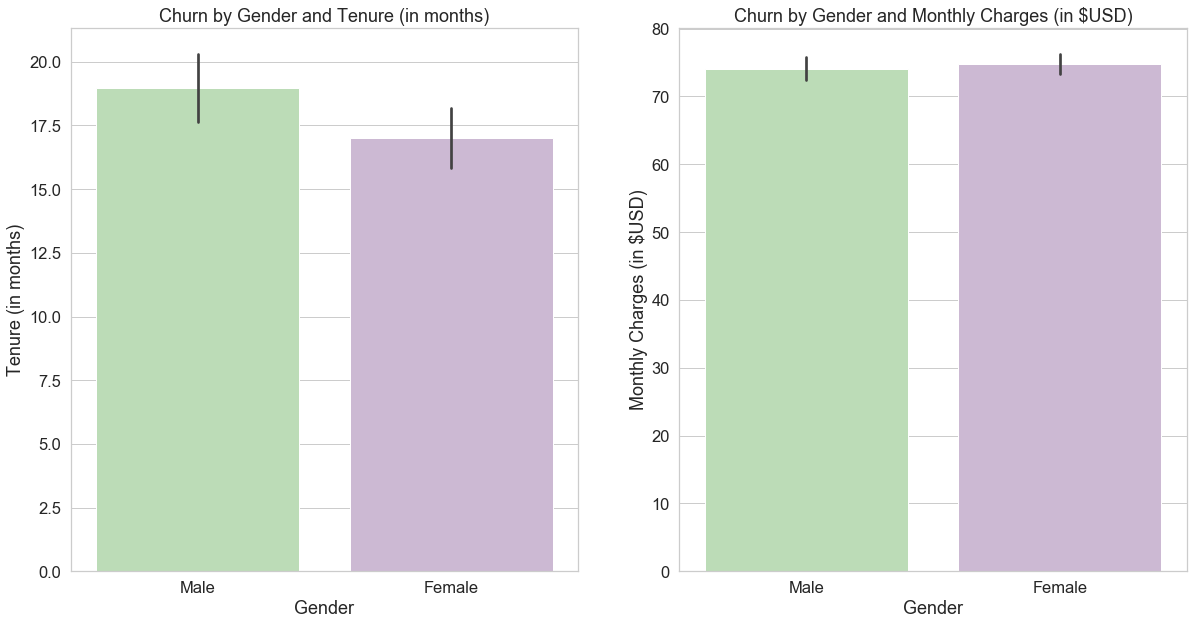

In [11]:
# gender/tenure/monthly charges subplots

plt.subplot(1, 2, 1)
ax = sns.barplot(x='gender', y='tenure', data=df.loc[(df.Churn == 'Yes')], palette='PRGn_r')
plt.title('Churn by Gender and Tenure (in months)')
ax.set(xlabel='Gender', ylabel='Tenure (in months)')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='gender', y='MonthlyCharges', data=df.loc[(df.Churn == 'Yes')], palette='PRGn_r')  
plt.title('Churn by Gender and Monthly Charges (in $USD)')
ax2.set(xlabel='Gender', ylabel='Monthly Charges (in $USD)')

plt.show();

## How does contract term affect churn?  

**Looking at the boxplots, women churn earlier than men in every contract term.  Customers who are month to month, stay with the company less than 10 months with women leaving slightly earlier than men.**  

**Customers who sign 2 year contract agreements stay with the company approximately 5 years for women, and 5.5 years for men.**. 

**Customers who sign 1 year contract agreements stay with the company approximately 4 years.  The difference between men and women is slight, although women still churn earlier than men.**

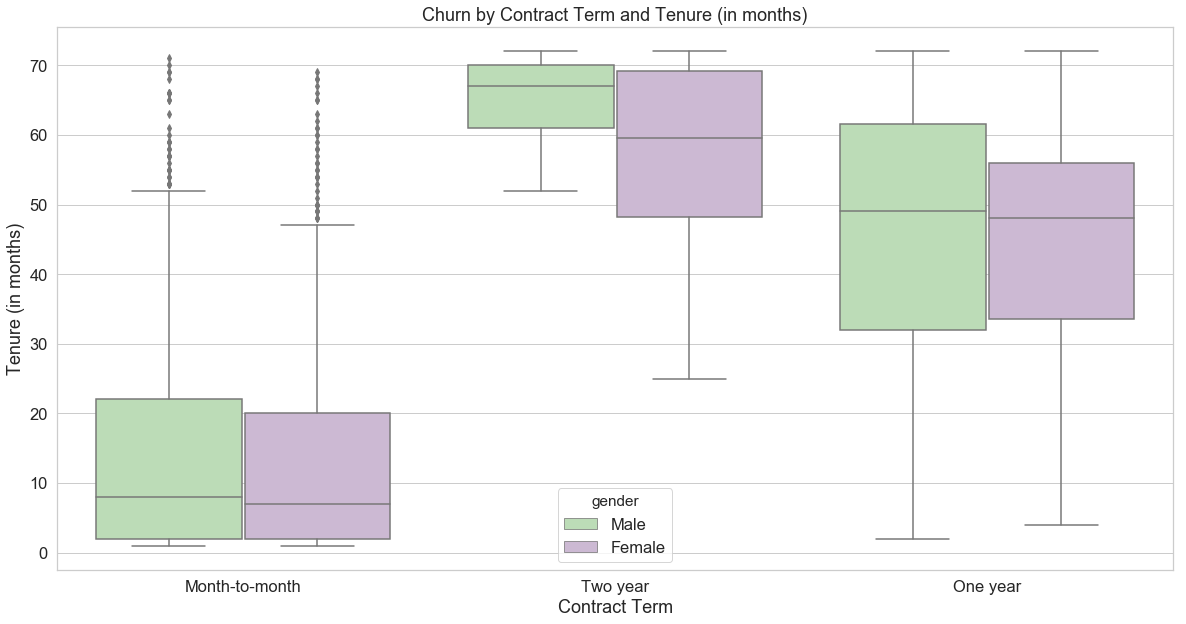

In [12]:
# comparing churn based on contract term

ax = sns.boxplot(x='Contract', y='tenure', hue='gender', data=df.loc[(df.Churn == 'Yes')], palette='PRGn_r')  
plt.title('Churn by Contract Term and Tenure (in months)')
ax.set(xlabel='Contract Term', ylabel='Tenure (in months)')
plt.show();

## How do monthly charges affect churn for customers with contracts?  

**For customers with month to month contracts, monthy charges are approximately equivalent for men and women with both paying just under $80/month.**

**For customers with 2 year contract terms, men pay more than women on average at about $110 compared to $90.**  

**For customers with 1 year contract agreements, women, on average, pay more than men at approximately $100/month compared to $85 for men.**

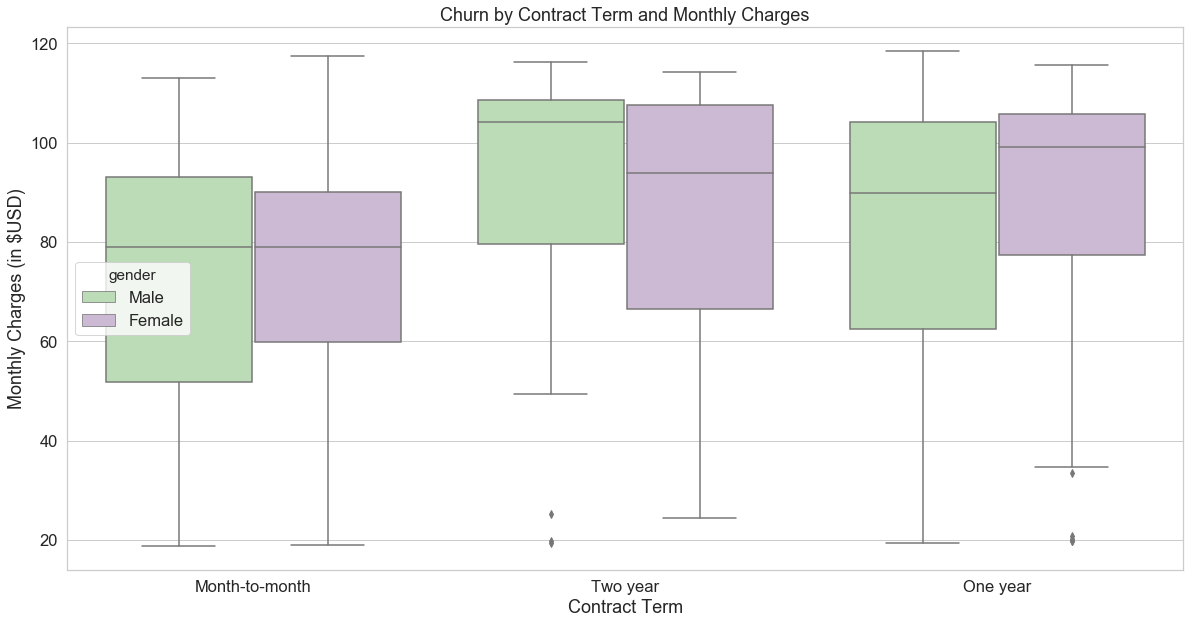

In [13]:
# comparing churn based on contract term & monthly charges

ax = sns.boxplot(x='Contract', y='MonthlyCharges', hue='gender', data=df.loc[(df.Churn == 'Yes')], palette='PRGn_r')  
plt.title('Churn by Contract Term and Monthly Charges')
ax.set(xlabel='Contract Term', ylabel='Monthly Charges (in $USD)')

plt.show();

## Does having dependents affect how quickly customers churn?  

**Yes, it does.  On average, people with dependents stay with the company longer approximately 6-8 months longer than people without dependents, and women continue to churn before men.** 

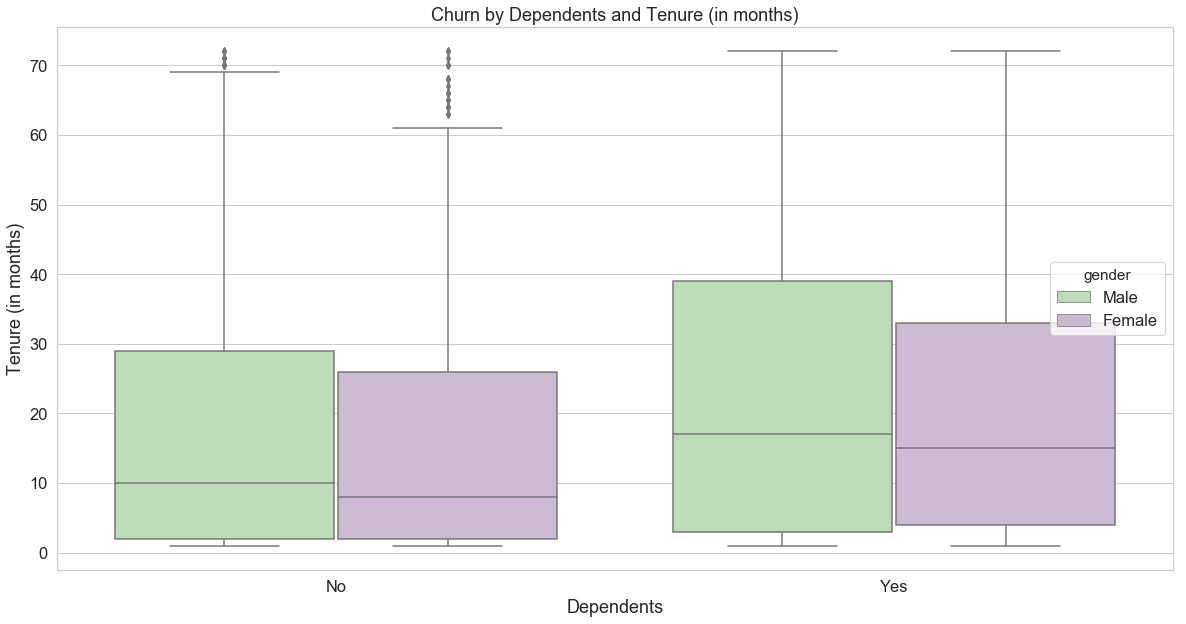

In [14]:
# comparing churn based on dependents

ax = sns.boxplot(x='Dependents', y='tenure', hue='gender', data=df.loc[(df.Churn == 'Yes')], palette='PRGn_r')  
plt.title('Churn by Dependents and Tenure (in months)')
ax.set(xlabel='Dependents', ylabel='Tenure (in months)')
plt.show();

## Do contract terms affect churn for people with dependents?  

**Yes, they do.  People with month to month and 2 year contract terms that have dependents stay with the company longer. Customers with month to month contracts stay with the company about 10 months. Customers in 2 year contracts stay with the company approximately 5.5 years.**

**Customers with 1 year contracts and dependents stay with the company a little less than 3.5 years, and customers without dependents stay a little over 4 years.**

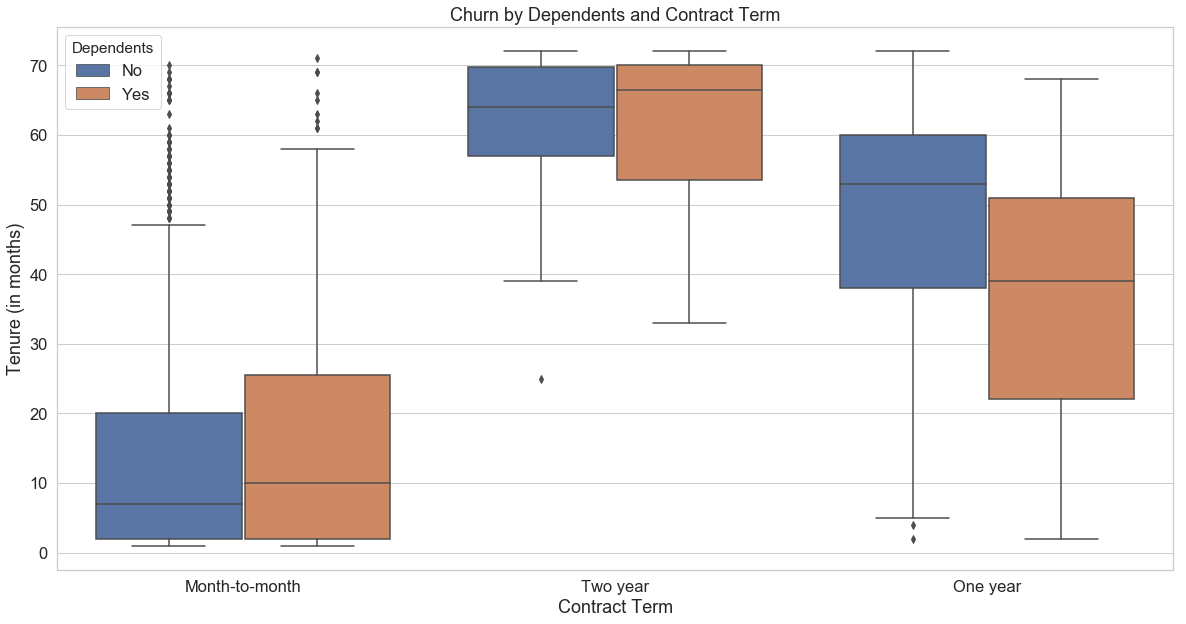

In [15]:
# comparing churn based on dependents

ax = sns.boxplot(x='Contract', y='tenure', hue='Dependents', data=df.loc[(df.Churn == 'Yes')])  
plt.title('Churn by Dependents and Contract Term')
ax.set(xlabel='Contract Term', ylabel='Tenure (in months)')
plt.show();

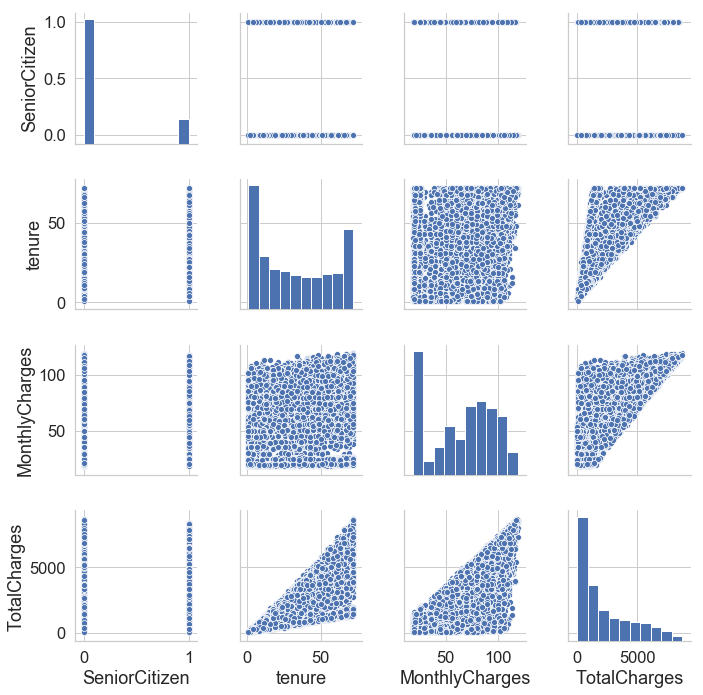

In [16]:
sns.pairplot(data=df);

In [17]:
df['gender'] = np.where(df['gender'] == 'Female', 1, 0)

In [18]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [19]:
df['Partner'] = np.where(df['Partner'] == 'Yes', 1, 0)

In [20]:
df['Dependents'] = np.where(df['Dependents'] == 'Yes', 1, 0)

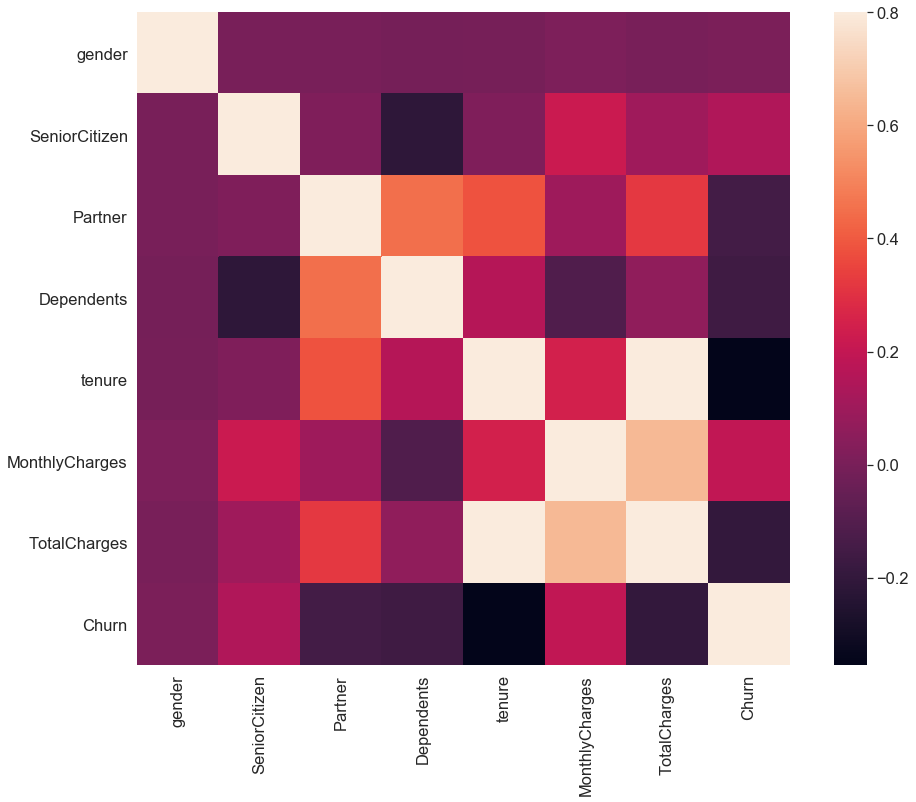

In [21]:
# correlation matrix

corrmat = df.corr()

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show();

#print(df.corr)

In [22]:
features = pd.get_dummies(df)

In [23]:
features.shape

(7032, 22)

In [24]:
y = features['Churn']
X = features.drop(['Churn'], axis=1)

In [25]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score = cross_val_score(rfc, X_test, y_test, cv=10)
print(rfc_score)
print(rfc_score.mean())

[ 0.77830189  0.77725118  0.73933649  0.78672986  0.76303318  0.76303318
  0.74407583  0.79620853  0.74881517  0.77619048]
0.767297577531


In [27]:
# random forest recall

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.439


In [28]:
# get prediction accuracy

y_pred = rfc.predict(X_test)
accuracy_score(y_test.values, y_pred)

0.76777251184834128

In [29]:
# mean squared error

print('Mean Absolute Error:\t%.2f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared Log Error:\t%.5f' % mean_squared_log_error(y_test, y_pred))

Mean Absolute Error:	0.23
Mean Squared Log Error:	0.11157


In [30]:
# create the function for the pipeline

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # the model to grid search
                       params, # the parameter set to try
                       error_score=0.) #if parameter raises an error, continue & set performance to 0
    grid.fit(X, y) # fit model and parameters
    print('Best Accuracy: {}'.format(grid.best_score_))
    print('Best Parameters: {}'.format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    avg_time_fit = round(grid.cv_results_['mean_fit_time'].mean(), 3)
    print('Average Time to Fit (s): {}'.format(avg_time_fit))
    # the average time to predict out of sample data (in seconds)
    print('Average Time to Score (s): {}'.format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [31]:
# set parameters for the pipeline 
# run random forest pipeline

feat_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components': [1, 2, 3, 4],
    'preprocessing__lda__n_components': range(1, 33)
}

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])
feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('rfc', ensemble.RandomForestClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.733646188850967
Best Parameters: {'preprocessing__lda__n_components': 22, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': True}
Average Time to Fit (s): 0.06
Average Time to Score (s): 0.005


In [32]:
# gradient boost classifier

# 500 iterations, 2-deep trees

params = {'n_estimators': 500,'max_depth': 2}

# Initialize and fit the model

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

clf_score = cross_val_score(clf, X_test, y_test, cv=10)
print(clf_score)
print(clf_score.mean())

[ 0.74056604  0.79146919  0.72985782  0.81516588  0.7535545   0.78199052
  0.77725118  0.77251185  0.74407583  0.82857143]
0.773501424356


In [33]:
# gradient boost recall score

print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

	Recall: 0.512


In [34]:
del feat_pipeline

In [35]:
# gradient boost pipeline

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])
feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', ensemble.GradientBoostingClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.787542662116041
Best Parameters: {'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 2, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.126
Average Time to Score (s): 0.004


In [36]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_score = cross_val_score(xgb, X_test, y_test, cv=10)
print(xgb_score)
print(xgb_score.mean())

[ 0.74056604  0.79620853  0.76303318  0.81042654  0.78199052  0.78199052
  0.76303318  0.77251185  0.75829384  0.82857143]
0.779662561797


In [37]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 0.633


In [38]:
del feat_pipeline

In [39]:
# xgboost pipeline

feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('xgb', XGBClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.7909556313993175
Best Parameters: {'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 2, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.068
Average Time to Score (s): 0.004


In [40]:
# KNN

knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy').mean()

0.75878921236741137

In [41]:
# knn pipeline

knn_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components': [1, 2, 3, 4],
    'preprocessing__lda__n_components': [1, 2, 3],
    'knn__n_neighbors': range(1, 40)
}

feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('knn', KNeighborsClassifier())])

get_best_model_and_accuracy(feat_pipeline, knn_params, X, y)

Best Accuracy: 0.7896757679180887
Best Parameters: {'knn__n_neighbors': 33, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 2, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.015
Average Time to Score (s): 0.007


## Model Evaluation  

**Each model classifies relatively accurately, although recall scores vary noticeably.  Running the data through a pipeline generally improves prediction accuracy, although the improvement is slight. Feature engineering could be beneficial in improving accuracy and recall scores.**

## Feature Importance  

**Both random forest and xgboost identify monthly charges, tenure, total charges and month to month contract as the top 4 features affecting prediction accuracy.  This is in line with visualizations about the data and customers with month to month contracts churning earlier than customers with both 1 and 2 year contracts.**

                                         importance
Feature                                            
MonthlyCharges                                 0.22
tenure                                         0.22
TotalCharges                                   0.21
Contract_Month-to-month                        0.07
InternetService_Fiber optic                    0.04
gender                                         0.03
Partner                                        0.03
PaymentMethod_Electronic check                 0.03
InternetService_No                             0.02
SeniorCitizen                                  0.02
Dependents                                     0.02
InternetService_DSL                            0.01
PaperlessBilling_Yes                           0.01
Contract_One year                              0.01
PaperlessBilling_No                            0.01
PaymentMethod_Credit card (automatic)          0.01
PaymentMethod_Mailed check                     0.01
PaymentMetho

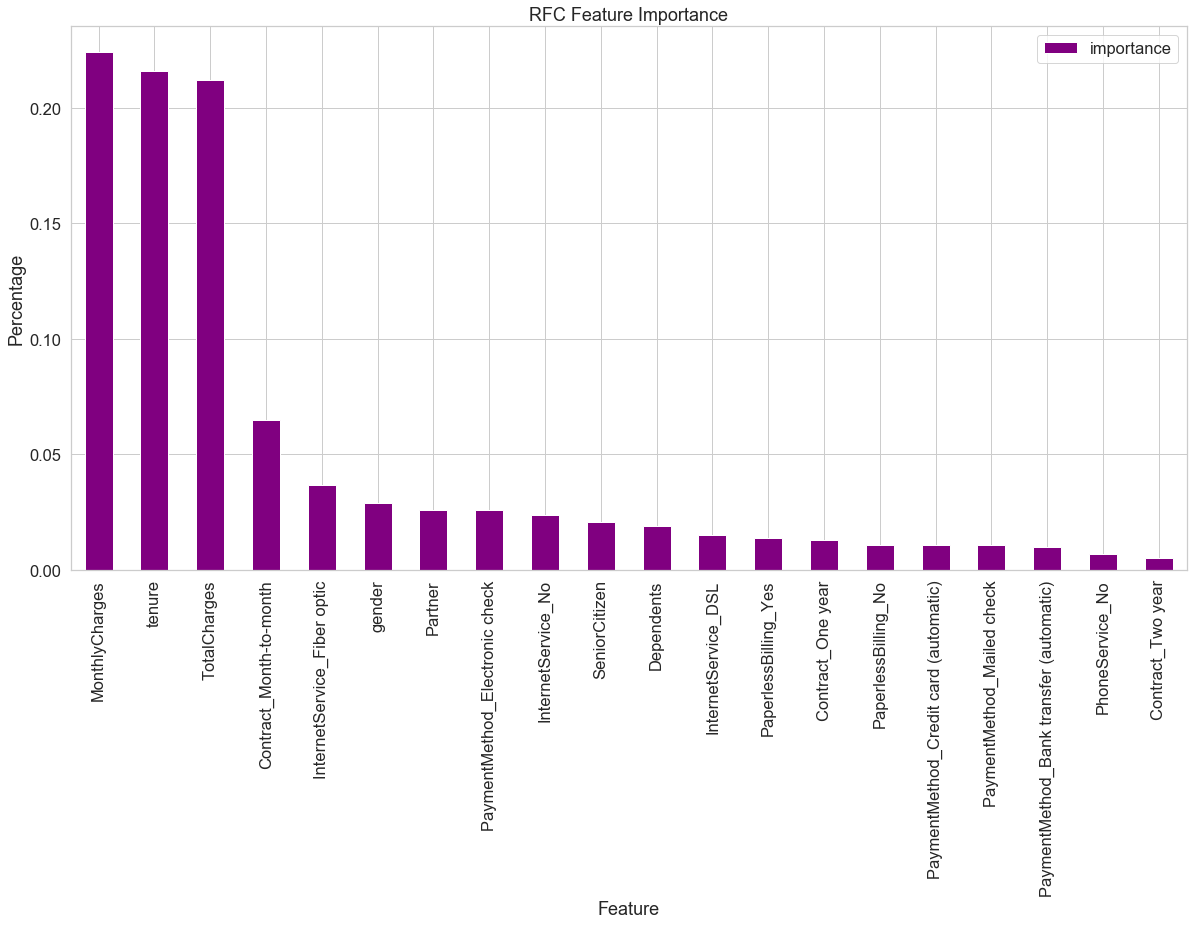

In [42]:
# rfc feature importance

importances = pd.DataFrame({'Feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('Feature')
 
print(importances[:20])
importances[:20].plot.bar(color='purple')
plt.title('RFC Feature Importance')
plt.ylabel('Percentage');

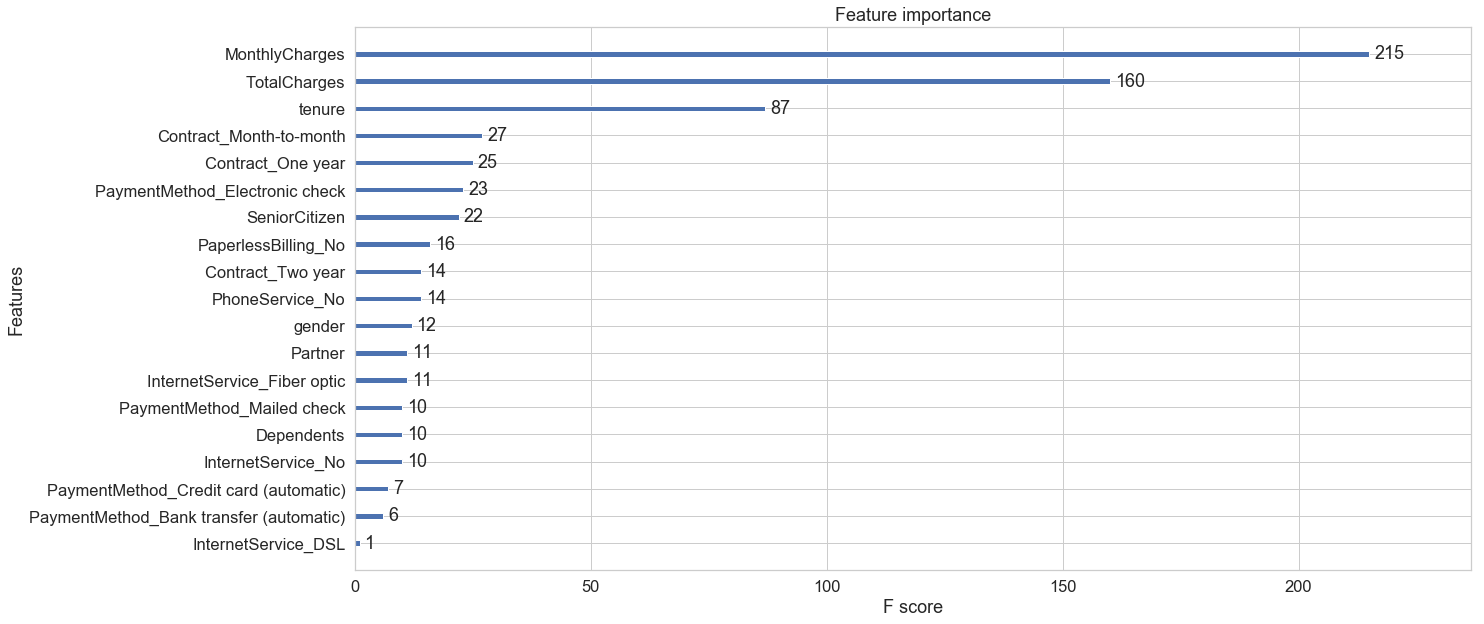

In [43]:
# xgboost classifier feature importance

plot_importance(xgb)
plt.show()

**XGBoost uses an F-score to determine feature importance. The F-score is a measure of how many times each feature is split on.**

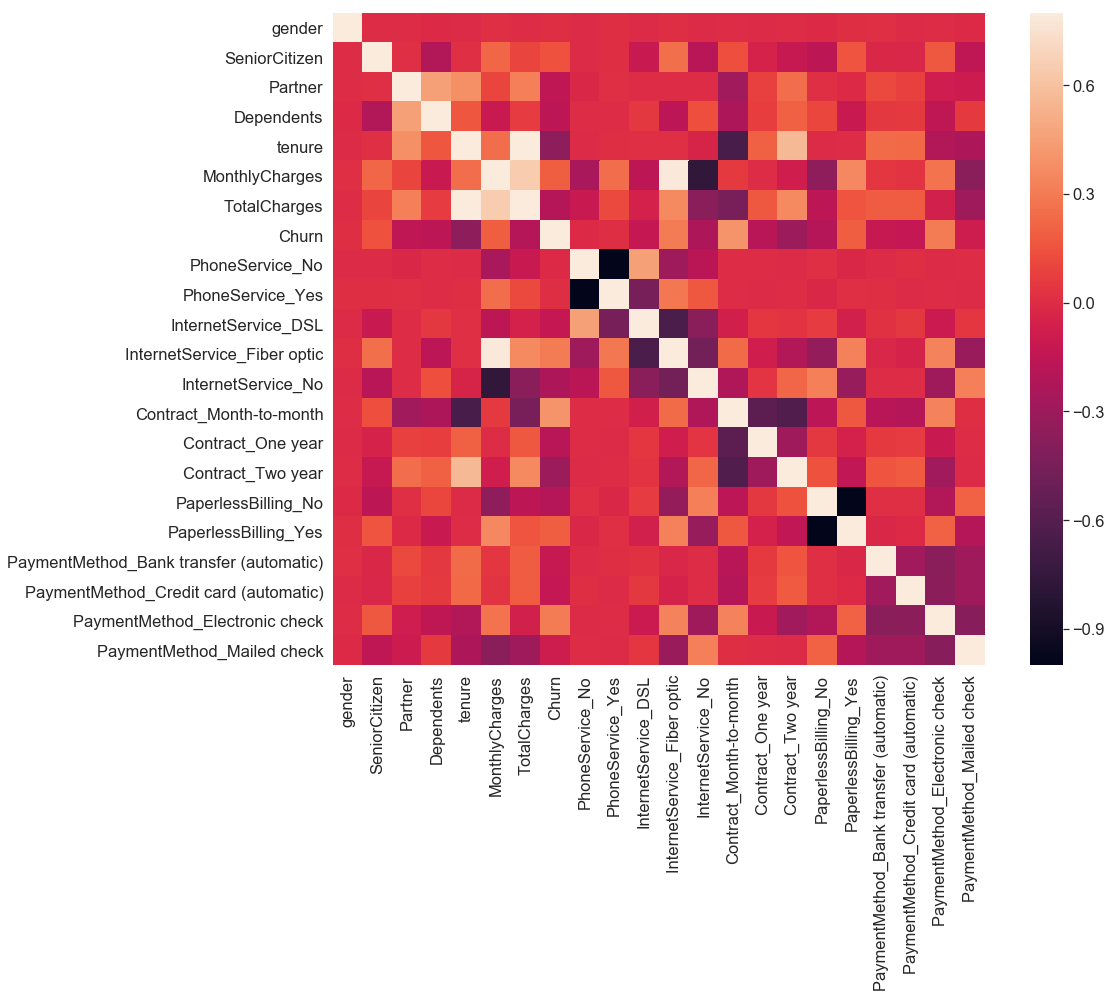

In [44]:
corrmat = features.corr()

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [46]:
# create interactions based on the most highly correlated features

features['total_tenure'] = features['TotalCharges'] * features['tenure']
features['dep_partner'] = features['Dependents'] * features['Partner']
features['fiber_monthly'] = features['InternetService_Fiber optic'] * features['MonthlyCharges']
features['contract_tenure'] = features['Contract_Two year'] * features['tenure']
features['monthly_churn'] = features['MonthlyCharges'] * features['Churn']
features['dep_fiber'] = features['Dependents'] * features['InternetService_Fiber optic']
features['dep_monthly'] = features['Dependents'] * features['MonthlyCharges']
features['dep_senior'] = features['SeniorCitizen'] * features['Dependents']
features['partner_total'] = features['Partner'] * features['TotalCharges']
features['partner_tenure'] = features['Partner'] * features['tenure']
features['senior_monthly'] = features['SeniorCitizen'] * features['MonthlyCharges']
features['dep_tenure'] = features['Dependents'] * features['tenure']

In [47]:
y = features['Churn']
X = features.drop(['Churn'], axis=1)

In [48]:
features.shape

(7032, 34)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score = cross_val_score(rfc, X_test, y_test, cv=10)
print(rfc_score)
print(rfc_score.mean())

[ 0.99528302  0.99526066  1.          1.          0.99526066  1.
  0.99526066  1.          1.          1.        ]
0.998106500939


In [51]:
# random forest recall

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 1.000


In [52]:
# get prediction accuracy

y_pred = rfc.predict(X_test)
accuracy_score(y_test.values, y_pred)

1.0

In [53]:
print('Mean Absolute Error:\t%.2f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared Log Error:\t%.5f' % mean_squared_log_error(y_test, y_pred))

Mean Absolute Error:	0.00
Mean Squared Log Error:	0.00000


**Random forest model likely overfitting due to 100% accuracy and recall numbers.**

In [54]:
# random forest pipeline

feat_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components': [1, 2, 3, 4],
    'preprocessing__lda__n_components': range(1, 45)
}

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])
feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('rfc', ensemble.RandomForestClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.8373151308304891
Best Parameters: {'preprocessing__lda__n_components': 37, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.062
Average Time to Score (s): 0.005


**Running through the pipeline appears to combat overfitting while still producing a model that classifies data accurately.  Feature engineering aided in improving accuracy scores.**

In [55]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_score = cross_val_score(xgb, X_test, y_test, cv=10)
print(xgb_score)
print(xgb_score.mean())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


In [56]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 1.000


In [57]:
del feat_pipeline

In [58]:
# xgboost pipeline

feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('xgb', XGBClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.8694539249146758
Best Parameters: {'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.088
Average Time to Score (s): 0.006


In [59]:
# gradient boost classifier

# 500 iterations, 2-deep trees

params = {'n_estimators': 500,
          'max_depth': 2}

# Initialize and fit the model

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

clf_score = cross_val_score(clf, X_test, y_test, cv=10)
print(clf_score)
print(clf_score.mean())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


In [60]:
# gradient boost recall score

print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

	Recall: 1.000


In [61]:
del feat_pipeline

In [62]:
# gradient boost pipeline

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])
feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', ensemble.GradientBoostingClassifier())])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.8681740614334471
Best Parameters: {'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.137
Average Time to Score (s): 0.004


In [63]:
# gradient boost pipeline

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', PCA()), ('lda', LinearDiscriminantAnalysis())])
feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', ensemble.GradientBoostingClassifier(**params))])

get_best_model_and_accuracy(feat_pipeline, feat_params, X, y)

Best Accuracy: 0.8597838452787259
Best Parameters: {'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 1.709
Average Time to Score (s): 1.643


In [64]:
# KNN

knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean()

0.800950797398295

In [65]:
del feat_pipeline
del knn_params

In [66]:
# knn pipeline

knn_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components': [1, 2, 3, 4],
    'preprocessing__lda__n_components': [1, 2, 3],
    'knn__n_neighbors': range(1, 54)
}

feat_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('knn', KNeighborsClassifier())])

get_best_model_and_accuracy(feat_pipeline, knn_params, X, y)

Best Accuracy: 0.872155858930603
Best Parameters: {'knn__n_neighbors': 53, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 4, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.017
Average Time to Score (s): 0.008


## Model Performance  

**Running the data through a pipeline seems to combat overfitting observed when running each model separately.  The random forest pipeline performed well, however xgboost and knn both performed better. KNN had higher accuracy and shorter fit time than xgboost. The knn pipelineis the most efficient, and should be tested in a production environment to verify performance.**

## Business Recommendations  

**Month to month contracts are identified as a significant feature in predicting churn.  Eliminate month to month contracts to improve customer retention.**  

**Women churn earlier than men, so targeted incentives to maintain the female customer base should be considered and explored.**  

**Additionally, a significant number of customers churn between 5-6 years, so customer loyalty bonuses or incentives could help retain customers ready to churn.**